https://adventofcode.com/2015/day/9

In [ ]:
input = r'''Faerun to Tristram = 65
Faerun to Tambi = 129
Faerun to Norrath = 144
Faerun to Snowdin = 71
Faerun to Straylight = 137
Faerun to AlphaCentauri = 3
Faerun to Arbre = 149
Tristram to Tambi = 63
Tristram to Norrath = 4
Tristram to Snowdin = 105
Tristram to Straylight = 125
Tristram to AlphaCentauri = 55
Tristram to Arbre = 14
Tambi to Norrath = 68
Tambi to Snowdin = 52
Tambi to Straylight = 65
Tambi to AlphaCentauri = 22
Tambi to Arbre = 143
Norrath to Snowdin = 8
Norrath to Straylight = 23
Norrath to AlphaCentauri = 136
Norrath to Arbre = 115
Snowdin to Straylight = 101
Snowdin to AlphaCentauri = 84
Snowdin to Arbre = 96
Straylight to AlphaCentauri = 107
Straylight to Arbre = 14
AlphaCentauri to Arbre = 46'''

In [ ]:
def parse_inst(inst):
  inst_l = inst.split(' ')
  return inst_l[0], inst_l[2], inst_l[4]

In [ ]:
import networkx as nx

G = nx.Graph()

for line in input.split("\n"):
  A, B, d = parse_inst(line)
  G.add_edge(A, B, weight=int(d))

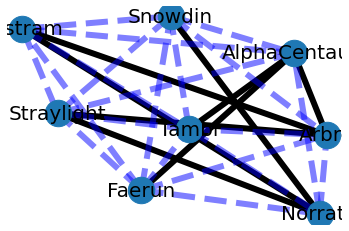

In [ ]:
import matplotlib.pyplot as plt

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 50]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 50]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

In [ ]:
from itertools import *

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

d = {}

for p in itertools.permutations(G.nodes()):
  path_len = 0
  for a, b in pairwise(p):
    path_len += G[a][b]['weight']
  d[p] = path_len

In [ ]:
min(d.items(), key=lambda pair: pair[1])

(('Faerun',
  'AlphaCentauri',
  'Tambi',
  'Snowdin',
  'Norrath',
  'Tristram',
  'Arbre',
  'Straylight'),
 117)

https://adventofcode.com/2015/day/9#part2

In [ ]:
max(d.items(), key=lambda pair: pair[1])

(('Tambi',
  'Arbre',
  'Faerun',
  'Norrath',
  'AlphaCentauri',
  'Straylight',
  'Tristram',
  'Snowdin'),
 909)